# KNHNES DATA EDA

In [1]:
# import modules
import pandas as pd
import numpy as np
import warnings

# graph
from matplotlib import pyplot as plt
import seaborn as sns

# split
from sklearn.model_selection import train_test_split

# modeling
from supervised.automl import AutoML

# XAI
import shap

%matplotlib inline

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# plt 한글 
plt.rcParams['font.family'] = 'NanumSquare'
plt.rcParams['font.size'] = 10

In [4]:
# loda data
data = pd.read_csv('../Data/K_ALL_sero.csv')

C:\Users\abc\AppData\Local\Temp\ipykernel_26824\181267442.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


In [5]:
data.columns

Index(['id', 'ID_fam', 'year', 'region', 'sex', 'age', 'age_month', 'DC2_dg',
       'DC2_ag', 'DC2_pr', 'DC2_pt', 'DK8_dg', 'DK8_ag', 'DK8_pr', 'DK8_pt',
       'DK9_dg', 'DK9_ag', 'DK9_pr', 'DK9_pt', 'DK4_dg', 'DK4_ag', 'DK4_pr',
       'DK4_pt', 'HE_glu', 'HE_HbA1c', 'HE_insulin', 'HE_chol', 'HE_HDL_st2',
       'HE_TG', 'HE_LDL_drct', 'HE_ast', 'HE_alt', 'HE_hepaB', 'HE_hepaC',
       'HE_HB', 'HE_BUN', 'HE_crea', 'HE_WBC', 'HE_RBC', 'HE_Bplt', 'HE_Uacid',
       'HE_Ubil', 'HE_UCREA', 'HE_Ualb'],
      dtype='object')

In [6]:
# 사용할 데이터 만들기
use_data_B = data.drop(['id', 'ID_fam', 'age_month', 'year',
                      'DC2_dg', 'DC2_ag', 'DC2_pr',
                      'DC2_pt', 'DK8_dg', 'DK8_ag',
                      'DK8_pt', 'DK9_dg','DK4_pt', 'region',
                      'DK9_ag', 'DK9_pr', 'DK9_pt', 'HE_LDL_drct',
                      'DK4_dg', 'DK4_ag', 'DK4_pr','HE_hepaB', 'HE_hepaC'
                      ],
                      axis = 1)

use_data_C = data.drop(['id', 'ID_fam', 'age_month', 'year',
                      'DC2_dg', 'DC2_ag', 'DC2_pr',
                      'DC2_pt', 'DK8_dg', 'DK8_ag',
                      'DK8_pr', 'DK8_pt', 'DK9_dg', 'region',
                      'DK9_ag', 'DK4_pt', 'DK9_pt', 'HE_LDL_drct',
                      'DK4_dg', 'DK4_ag', 'DK4_pr', 'HE_hepaB', 'HE_hepaC'
                      ],
                      axis = 1)

In [7]:
use_data_B['DK8_pr'].value_counts()

DK8_pr
8.0    104685
9.0      3266
0.0       756
1.0       502
Name: count, dtype: int64

In [8]:
# hepaB,C have 0, 1
B = use_data_B[use_data_B['DK8_pr'].isin([0, 1])]
C = use_data_C[use_data_C['DK9_pr'].isin([0, 1])]

c:\Users\abc\anaconda3\envs\ss\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


<Axes: >

c:\Users\abc\anaconda3\envs\ss\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
c:\Users\abc\anaconda3\envs\ss\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


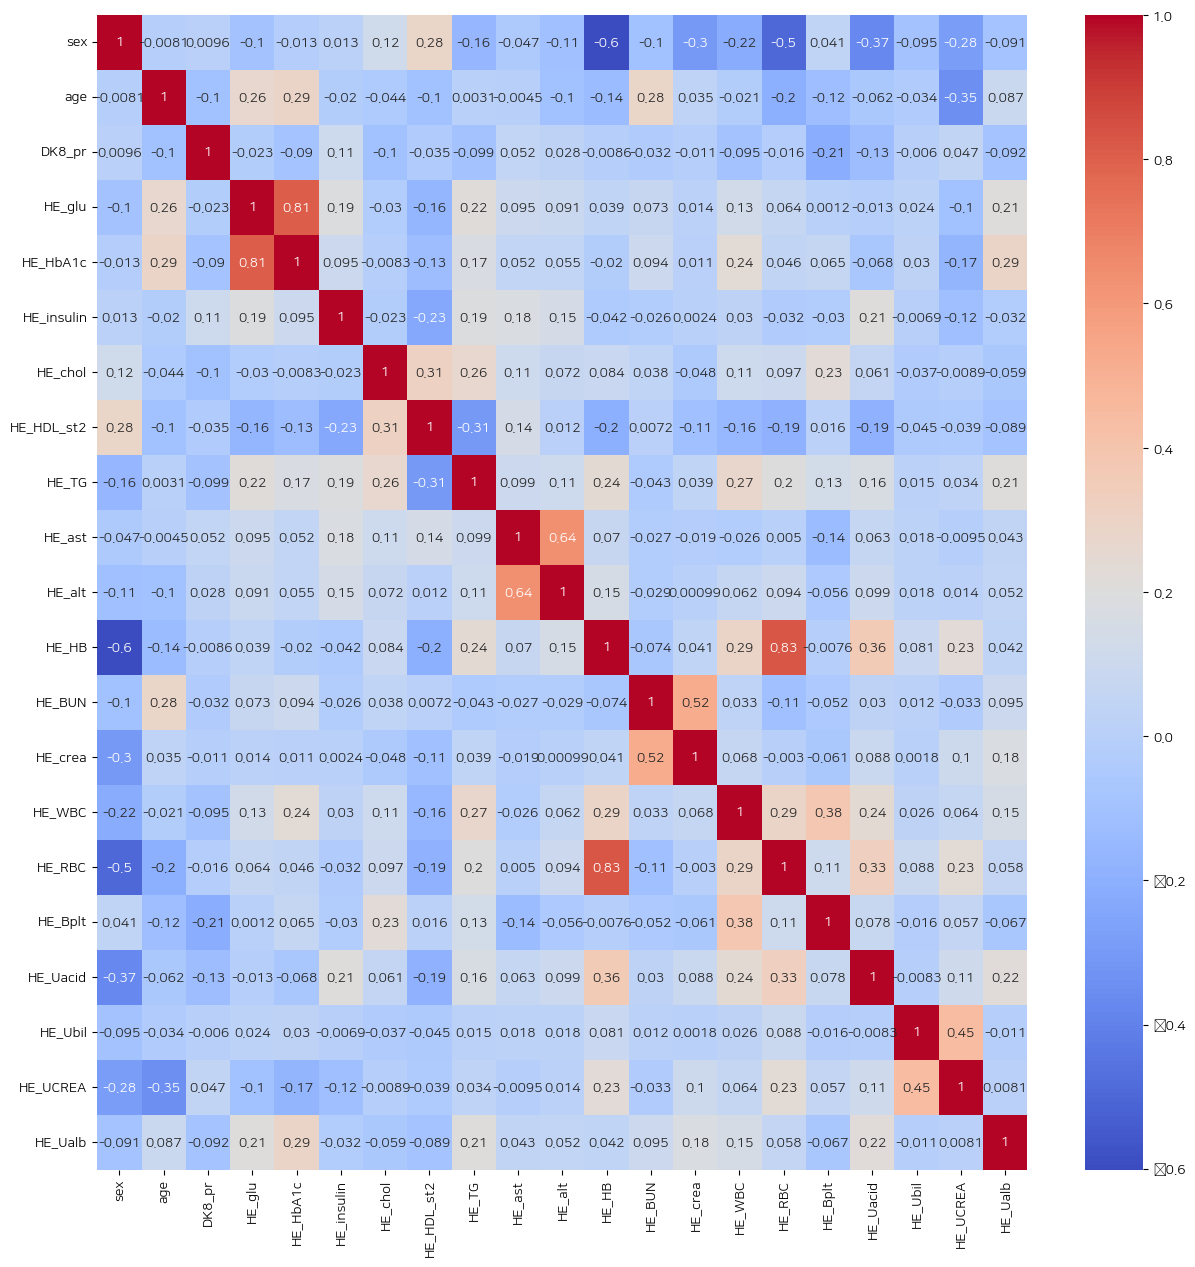

In [16]:
plt.figure(figsize = (15, 15))
sns.heatmap(B.corr(), annot = True, cmap='coolwarm')

c:\Users\abc\anaconda3\envs\ss\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


<Axes: >

c:\Users\abc\anaconda3\envs\ss\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
c:\Users\abc\anaconda3\envs\ss\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


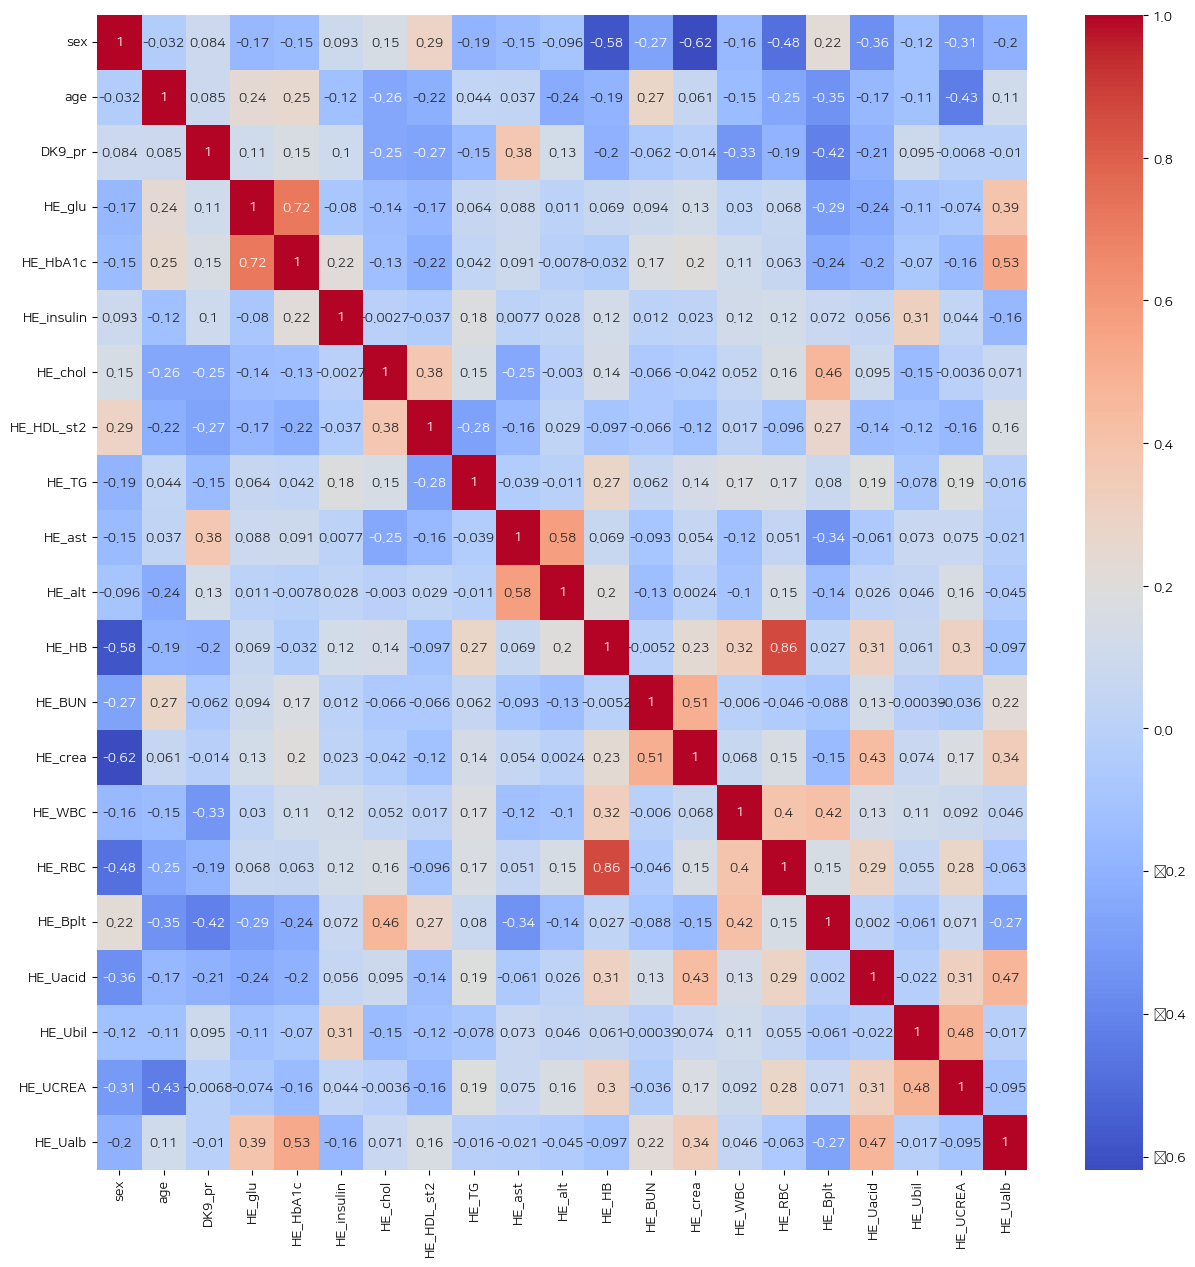

In [17]:
plt.figure(figsize = (15, 15))
sns.heatmap(C.corr(), annot = True, cmap='coolwarm')

<Axes: xlabel='HE_ast', ylabel='HE_alt'>

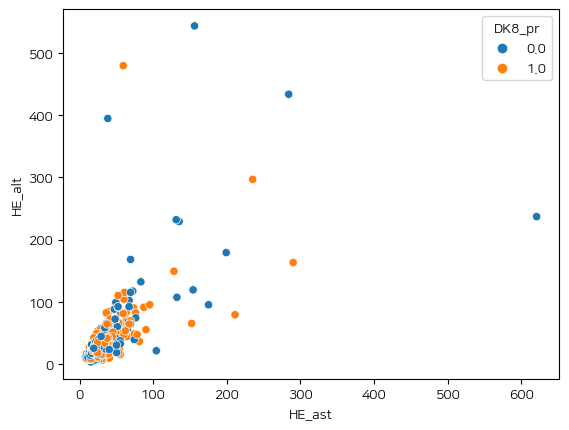

In [18]:
sns.scatterplot(data = B, x = 'HE_ast', y = 'HE_alt', hue = 'DK8_pr')